# Bài toán tìm cặp điểm gần nhất (Closest pair of point)

## 1. Phân tích bài toán

- **Đầu vào:** Một tập hợp `P` gồm `n` điểm trên mặt phẳng tọa độ 2D, mỗi điểm được biểu diễn dưới dạng `(x, y)`.

- **Đầu ra:** Hai điểm trong tập hợp có khoảng cách Euclidean nhỏ nhất.

### Khoảng cách Euclidean
Khoảng cách giữa hai điểm `p1(x1, y1)` và `p2(x2, y2)` được tính bằng công thức:

\[
d(p_1, p_2) = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}
\]

---

## 2. Các phương pháp giải bài toán

### 2.1 Phương pháp Brute Force (O(n²))
Cách đơn giản nhất là kiểm tra khoảng cách của mọi cặp điểm, sau đó chọn cặp có khoảng cách nhỏ nhất.

#### Thuật toán
1. Khởi tạo giá trị `min_distance = ∞`.
2. Lặp qua tất cả các cặp điểm `(p_i, p_j)` với `i ≠ j`.
3. Tính khoảng cách `d(p_i, p_j)`.
4. Nếu `d(p_i, p_j) < min_distance`, cập nhật `min_distance`.
5. Trả về cặp điểm có khoảng cách nhỏ nhất.

#### Độ phức tạp
Do có `n(n-1)/2` cặp điểm, thuật toán có độ phức tạp **O(n²)**.

---

### 2.2 Phương pháp Chia để Trị (Divide and Conquer) - O(n log n)
Cách tối ưu hơn sử dụng **chia để trị**, giúp giảm độ phức tạp xuống **O(n log n)**.

#### Thuật toán
1. **Sắp xếp tập hợp điểm** theo tọa độ `x`.
2. **Chia đôi tập điểm** thành hai phần bằng nhau.
3. **Gọi đệ quy** để tìm cặp điểm gần nhất ở từng phần.
4. **Tìm cặp điểm gần nhất giữa hai nửa** bằng cách kiểm tra các điểm nằm gần đường chia dọc.
5. Trả về khoảng cách nhỏ nhất trong ba trường hợp trên.

#### Phân tích độ phức tạp
- Bước sắp xếp: `O(n log n)`.
- Mỗi lần chia làm hai phần: `O(log n)` lần đệ quy.
- Tìm cặp điểm gần nhất trong vùng dọc mất `O(n)`.

Tổng thời gian chạy:

\[
T(n) = 2T(n/2) + O(n)
\]

Giải bằng phương pháp **chia để trị**, ta có **O(n log n)**.

In [1]:
import math

def distance(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def brute_force(points):
    min_dist = float('inf')
    closest_pair = None
    n = len(points)
    for i in range(n):
        for j in range(i + 1, n):
            d = distance(points[i], points[j])
            if d < min_dist:
                min_dist = d
                closest_pair = (points[i], points[j])
    return min_dist, closest_pair

def strip_closest(strip, d):
    min_dist = d
    closest_pair = None
    strip.sort(key=lambda point: point[1])

    for i in range(len(strip)):
        for j in range(i + 1, min(i + 7, len(strip))):
            d = distance(strip[i], strip[j])
            if d < min_dist:
                min_dist = d
                closest_pair = (strip[i], strip[j])
    return min_dist, closest_pair

def closest_util(points):
    if len(points) <= 3:
        return brute_force(points)

    mid = len(points) // 2
    mid_point = points[mid]

    dl, pair_l = closest_util(points[:mid])
    dr, pair_r = closest_util(points[mid:])

    if dl < dr:
        d = dl
        closest_pair = pair_l
    else:
        d = dr
        closest_pair = pair_r

    strip = [p for p in points if abs(p[0] - mid_point[0]) < d]

    d_strip, pair_strip = strip_closest(strip, d)

    if d_strip < d:
        return d_strip, pair_strip
    else:
        return d, closest_pair

def closest_pair(points):
    points.sort()
    return closest_util(points)

points = [(2, 9), (12, 30), (40, 50), (5, 1), (12, 10), (3, 4)]
min_dist, pair = closest_pair(points)
print("Cặp điểm gần nhất:", pair, "với khoảng cách:", min_dist)


Cặp điểm gần nhất: ((3, 4), (5, 1)) với khoảng cách: 3.605551275463989


## Bài toán tìm bao lồi (Convex-Hull problem)

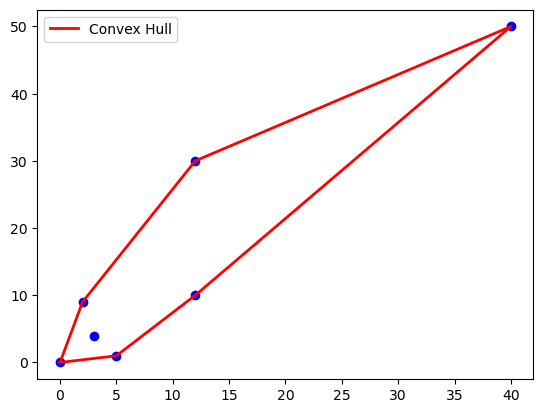

In [2]:
import matplotlib.pyplot as plt

def orientation(p, q, r):
    """Tính hướng của bộ ba điểm (p, q, r)."""
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0
    return 1 if val > 0 else -1

def convex_hull(points):
    """Thuật toán Graham Scan để tìm bao lồi."""
    points = sorted(points)
    if len(points) < 3:
        return points

    lower = []
    for p in points:
        while len(lower) >= 2 and orientation(lower[-2], lower[-1], p) != -1:
            lower.pop()
        lower.append(p)

    upper = []
    for p in reversed(points):
        while len(upper) >= 2 and orientation(upper[-2], upper[-1], p) != -1:
            upper.pop()
        upper.append(p)

    return lower[:-1] + upper[:-1]  # Loại bỏ điểm trùng lặp

points = [(2, 9), (12, 30), (40, 50), (5, 1), (12, 10), (3, 4), (0,0)]
hull = convex_hull(points)

plt.scatter(*zip(*points), color='blue')
hull.append(hull[0])  # Đóng đa giác
plt.plot(*zip(*hull), color='red', linestyle='-', linewidth=2, label='Convex Hull')
plt.legend()
plt.show()

## Bài toán tìm đồng xu giả (Fake Coin problem)

In [ ]:
import random

def weigh(group1, group2):
    """
    So sánh khối lượng của hai nhóm đồng xu.
    Trả về:
    -1 nếu nhóm 1 nhẹ hơn
     1 nếu nhóm 1 nặng hơn
     0 nếu hai nhóm bằng nhau
    """
    weight1 = sum(group1)
    weight2 = sum(group2)
    if weight1 < weight2:
        return -1
    elif weight1 > weight2:
        return 1
    return 0

def find_fake_coin(coins, left, right):
    n = right - left + 1
    if n == 1:
        return left

    third = n // 3
    group1 = coins[left:left + third]
    group2 = coins[left + third:left + 2 * third]
    group3 = coins[left + 2 * third:right + 1] if 2 * third < n else []

    result = weigh(group1, group2)

    if result == 0:
        return find_fake_coin(coins, left + 2 * third, right)
    elif result == -1:
        return find_fake_coin(coins, left, left + third - 1)
    else:
        return find_fake_coin(coins, left + third, left + 2 * third - 1)

n = 20
coins = [10] * n
fake_index = random.randint(0, n - 1)
coins[fake_index] = 9

found_index = find_fake_coin(coins, 0, n - 1)
print(f"Đồng xu giả nằm ở vị trí: {found_index} (Giá trị thật: {fake_index})")


## Phương pháp khử Gauss: giải hệ PT; tính định thức; tìm ma trận nghịch đảo (Gaussian Elimination)